In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
vertebral_column = fetch_ucirepo(id=212)

# data (as pandas dataframes)
X = vertebral_column.data.features
y = vertebral_column.data.targets

# metadata
print(vertebral_column.metadata)

# variable information
print(vertebral_column.variables)

{'uci_id': 212, 'name': 'Vertebral Column', 'repository_url': 'https://archive.ics.uci.edu/dataset/212/vertebral+column', 'data_url': 'https://archive.ics.uci.edu/static/public/212/data.csv', 'abstract': 'Data set containing values for six biomechanical features used to classify orthopaedic patients into 3 classes (normal, disk hernia or spondilolysthesis) or 2 classes (normal or abnormal).', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 310, 'num_features': 6, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2005, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C5K89B', 'creators': ['Guilherme Barreto', 'Ajalmar Neto'], 'intro_paper': None, 'additional_info': {'summary': "Biomedical data set built by Dr. Henrique da Mota during a medical residence period in the Group of Applied R

# Pair Plot

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.concat([X, y], axis=1)

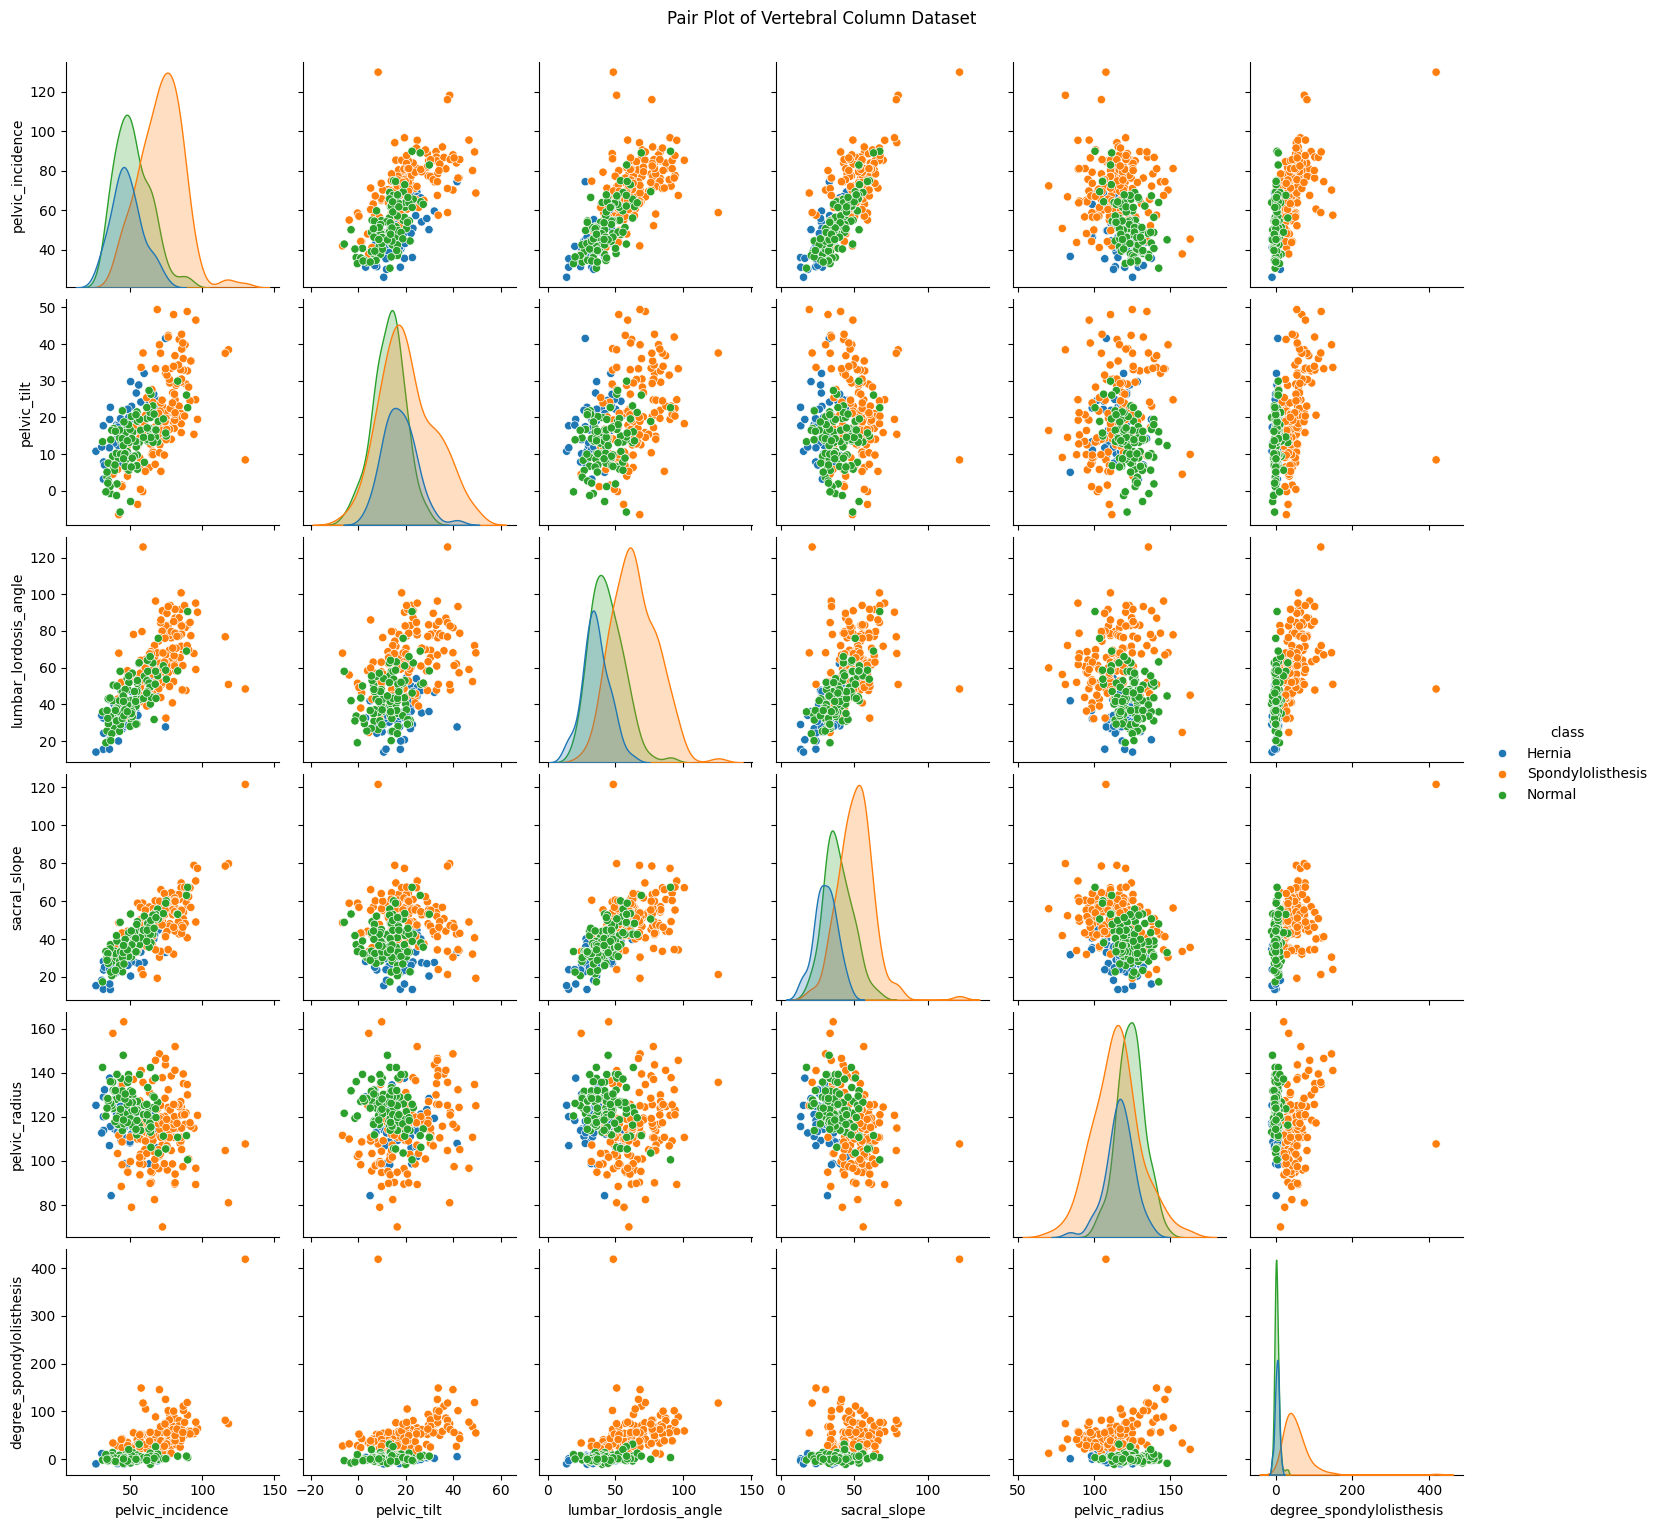

In [6]:
sns.pairplot(data, hue='class')
plt.suptitle('Pair Plot of Vertebral Column Dataset', y=1.02)
plt.show()

# Correlation Heatmap

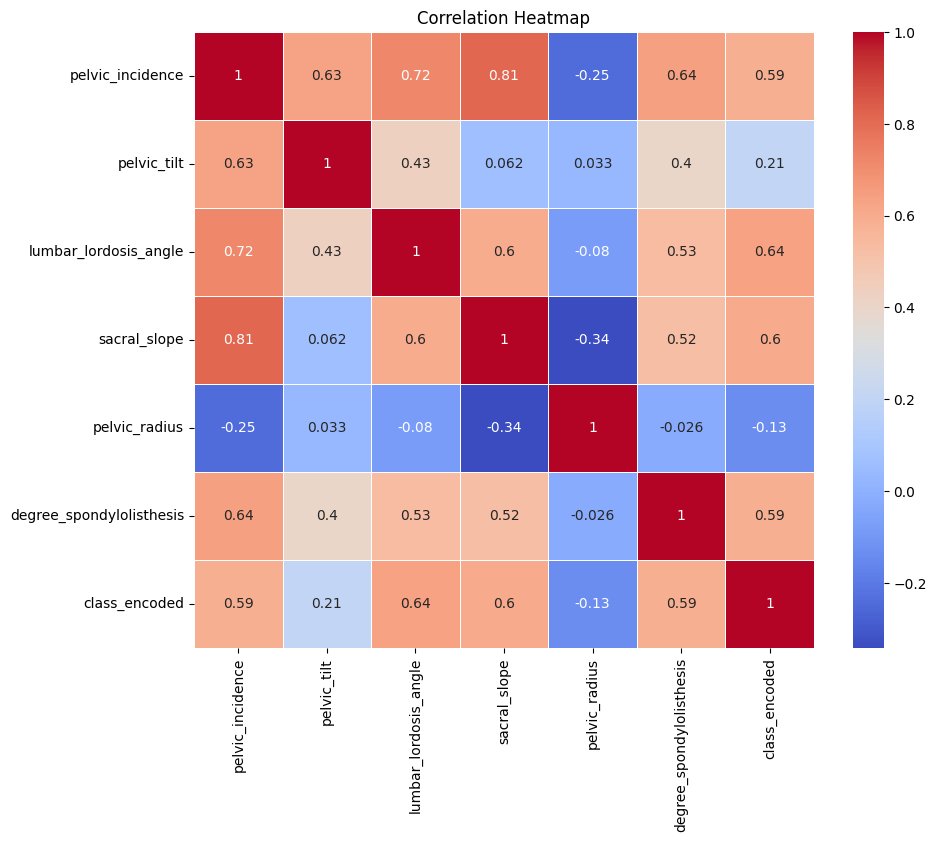

In [9]:
# Convert the 'class' column to a numerical representation
data['class_encoded'] = data['class'].astype('category').cat.codes

# Calculate the correlation matrix excluding the original 'class' column
correlation_matrix = data.drop('class', axis=1).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Box Plot

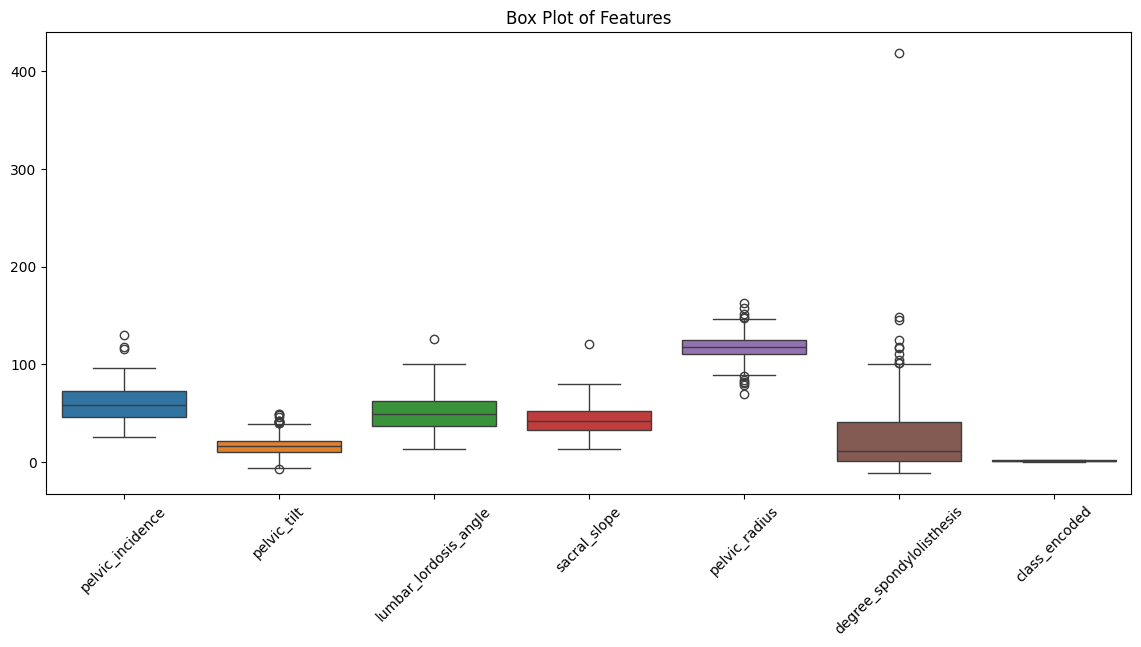

In [10]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=data.drop(columns=['class']))
plt.title('Box Plot of Features')
plt.xticks(rotation=45)
plt.show()

# Class Distribution

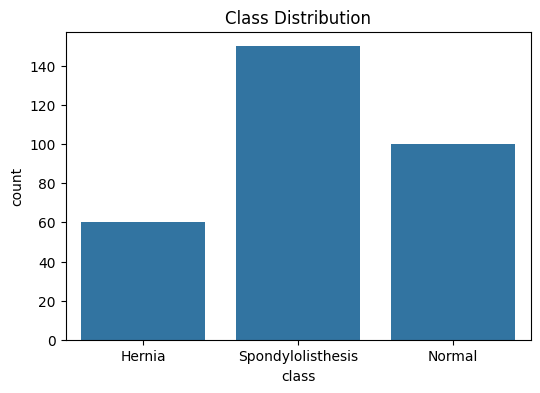

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=data)
plt.title('Class Distribution')
plt.show()

# 3D Scatter Plot

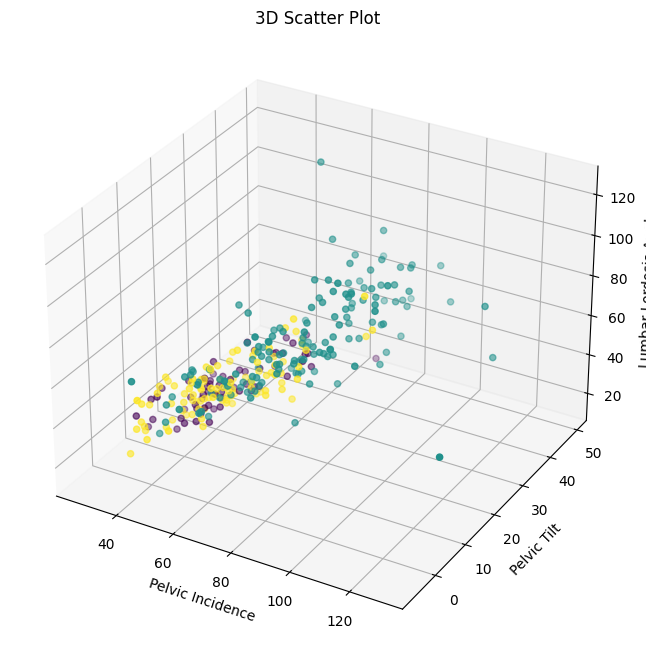

In [14]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'data' is your DataFrame
# ... (Your existing code to create 'data')

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Map class labels to numerical values
class_mapping = {'Hernia': 0, 'Spondylolisthesis': 1, 'Normal': 2}
numerical_classes = data['class'].map(class_mapping)

# Use numerical_classes for color mapping
ax.scatter(data['pelvic_incidence'], data['pelvic_tilt'], data['lumbar_lordosis_angle'],
           c=numerical_classes, cmap='viridis')
ax.set_xlabel('Pelvic Incidence')
ax.set_ylabel('Pelvic Tilt')
ax.set_zlabel('Lumbar Lordosis Angle')
plt.title('3D Scatter Plot')
plt.show()

# Comments



* Pair Plot: This provides a comprehensive view of the relationships between pairs of features, color-coded by the class label.

* Correlation Heatmap: Helps to identify which features are strongly correlated with each other.

* Box Plot: Useful for detecting outliers and understanding the distribution of feature values.

* Class Distribution: Shows how many instances belong to each class, which can be useful for understanding class imbalance.

* 3D Scatter Plot: Visualizes the relationship between three selected features and the class label, which can help identify any potential clusters or patterns.
  * Class Mapping: We create a dictionary class_mapping to assign numerical values (0, 1, 2) to the class labels ('Hernia', 'Spondylolisthesis', 'Normal').
  * Numerical Classes: We use the map function to apply this mapping to the 'class' column, creating a new series numerical_classes containing numerical values.
  * Scatter Plot: We now pass numerical_classes to the c argument of ax.scatter, allowing the colormap to be applied correctly.

